In [2]:
from utils.binaries import *
from utils.Auger.SD import UubRandoms

14:26:19 (+1855.6s) [INFO   ] -- import logging
14:26:19 (  +183ms) [INFO   ] -- import numpy as np
14:26:19 (   +10ms) [INFO   ] -- import uncertainties
14:26:19 (  +492ms) [INFO   ] -- import pandas as pd
14:26:19 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
14:26:19 (    +1ms) [INFO   ] -- import binaries.tools as tools


In [ ]:
from numba import jit

@jit
def trigger(trace):
    for _bin in trace:
        if _bin > 2.64: return True
    else: False

test = UubRandoms.BackgroundStudy(trigger)
print(test)

# *********************************  
# *** UUB RANDOMS TRIGGER STUDY ***
# *********************************

#   time passed:        68.1541 s
#   triggers:                3104

#   rate:           45.5+/-0.8 Hz

In [ ]:
from numba import jit

@jit
def trigger2(trace):
    for _bin in trace:
        if _bin > 2.64 * 0.8236: return True
    else: False

test = UubRandoms.BackgroundStudy(trigger2)
print(test)

# *********************************  
# *** UUB RANDOMS TRIGGER STUDY ***
# *********************************

#   time passed:  68.1541 s
#   triggers:     5575

#   rate:         81.8+/-1.1 Hz

800/800 [********************] || 00:20:27>00:00:00,         0.65 it/s
*********************************  
*** UUB RANDOMS TRIGGER STUDY ***
*********************************

  time passed:  68.1541 s
  triggers:     5575

  rate:         81.8+/-1.1 Hz


In [9]:
from numba import jit

rates = {}

for threshold in np.arange(2.04, 3.04, 0.1):
    
    @jit
    def trigger(trace):
        for _bin in trace:
            if _bin > threshold: return True
        else: False

    test = UubRandoms.BackgroundStudy(trigger)
    rates[f"{threshold:.2f}"] =  test.triggers / test.time_passed

800/800 [********************] || 00:12:26>00:00:00,         1.07 it/s
800/800 [********************] || 00:12:23>00:00:00,         1.08 it/s
800/800 [********************] || 00:12:19>00:00:00,         1.08 it/s
800/800 [********************] || 00:12:14>00:00:00,         1.09 it/s
800/800 [********************] || 00:12:12>00:00:00,         1.09 it/s
800/800 [********************] || 00:12:14>00:00:00,         1.09 it/s
800/800 [********************] || 00:12:25>00:00:00,         1.07 it/s
800/800 [********************] || 00:12:46>00:00:00,         1.04 it/s
800/800 [********************] || 00:12:43>00:00:00,         1.05 it/s
800/800 [********************] || 00:12:15>00:00:00,         1.09 it/s


In [12]:
# finer binning in interesting region
for threshold in np.arange(2.25, 2.34, 0.01):

    @jit
    def trigger(trace):
        for _bin in trace:
            if _bin > threshold: return True
        else: False

    test = UubRandoms.BackgroundStudy(trigger)
    rates[f"{threshold:.2f}"] =  test.triggers / test.time_passed

800/800 [********************] || 00:12:26>00:00:00,         1.07 it/s
800/800 [********************] || 00:12:43>00:00:00,         1.05 it/s
800/800 [********************] || 00:12:21>00:00:00,         1.08 it/s
800/800 [********************] || 00:12:15>00:00:00,         1.09 it/s
800/800 [********************] || 00:12:20>00:00:00,         1.08 it/s
800/800 [********************] || 00:12:19>00:00:00,         1.08 it/s
800/800 [********************] || 00:12:20>00:00:00,         1.08 it/s
800/800 [********************] || 00:12:17>00:00:00,         1.08 it/s
800/800 [********************] || 00:12:18>00:00:00,         1.08 it/s


Text(0, 0.5, 'int. rate / Hz')

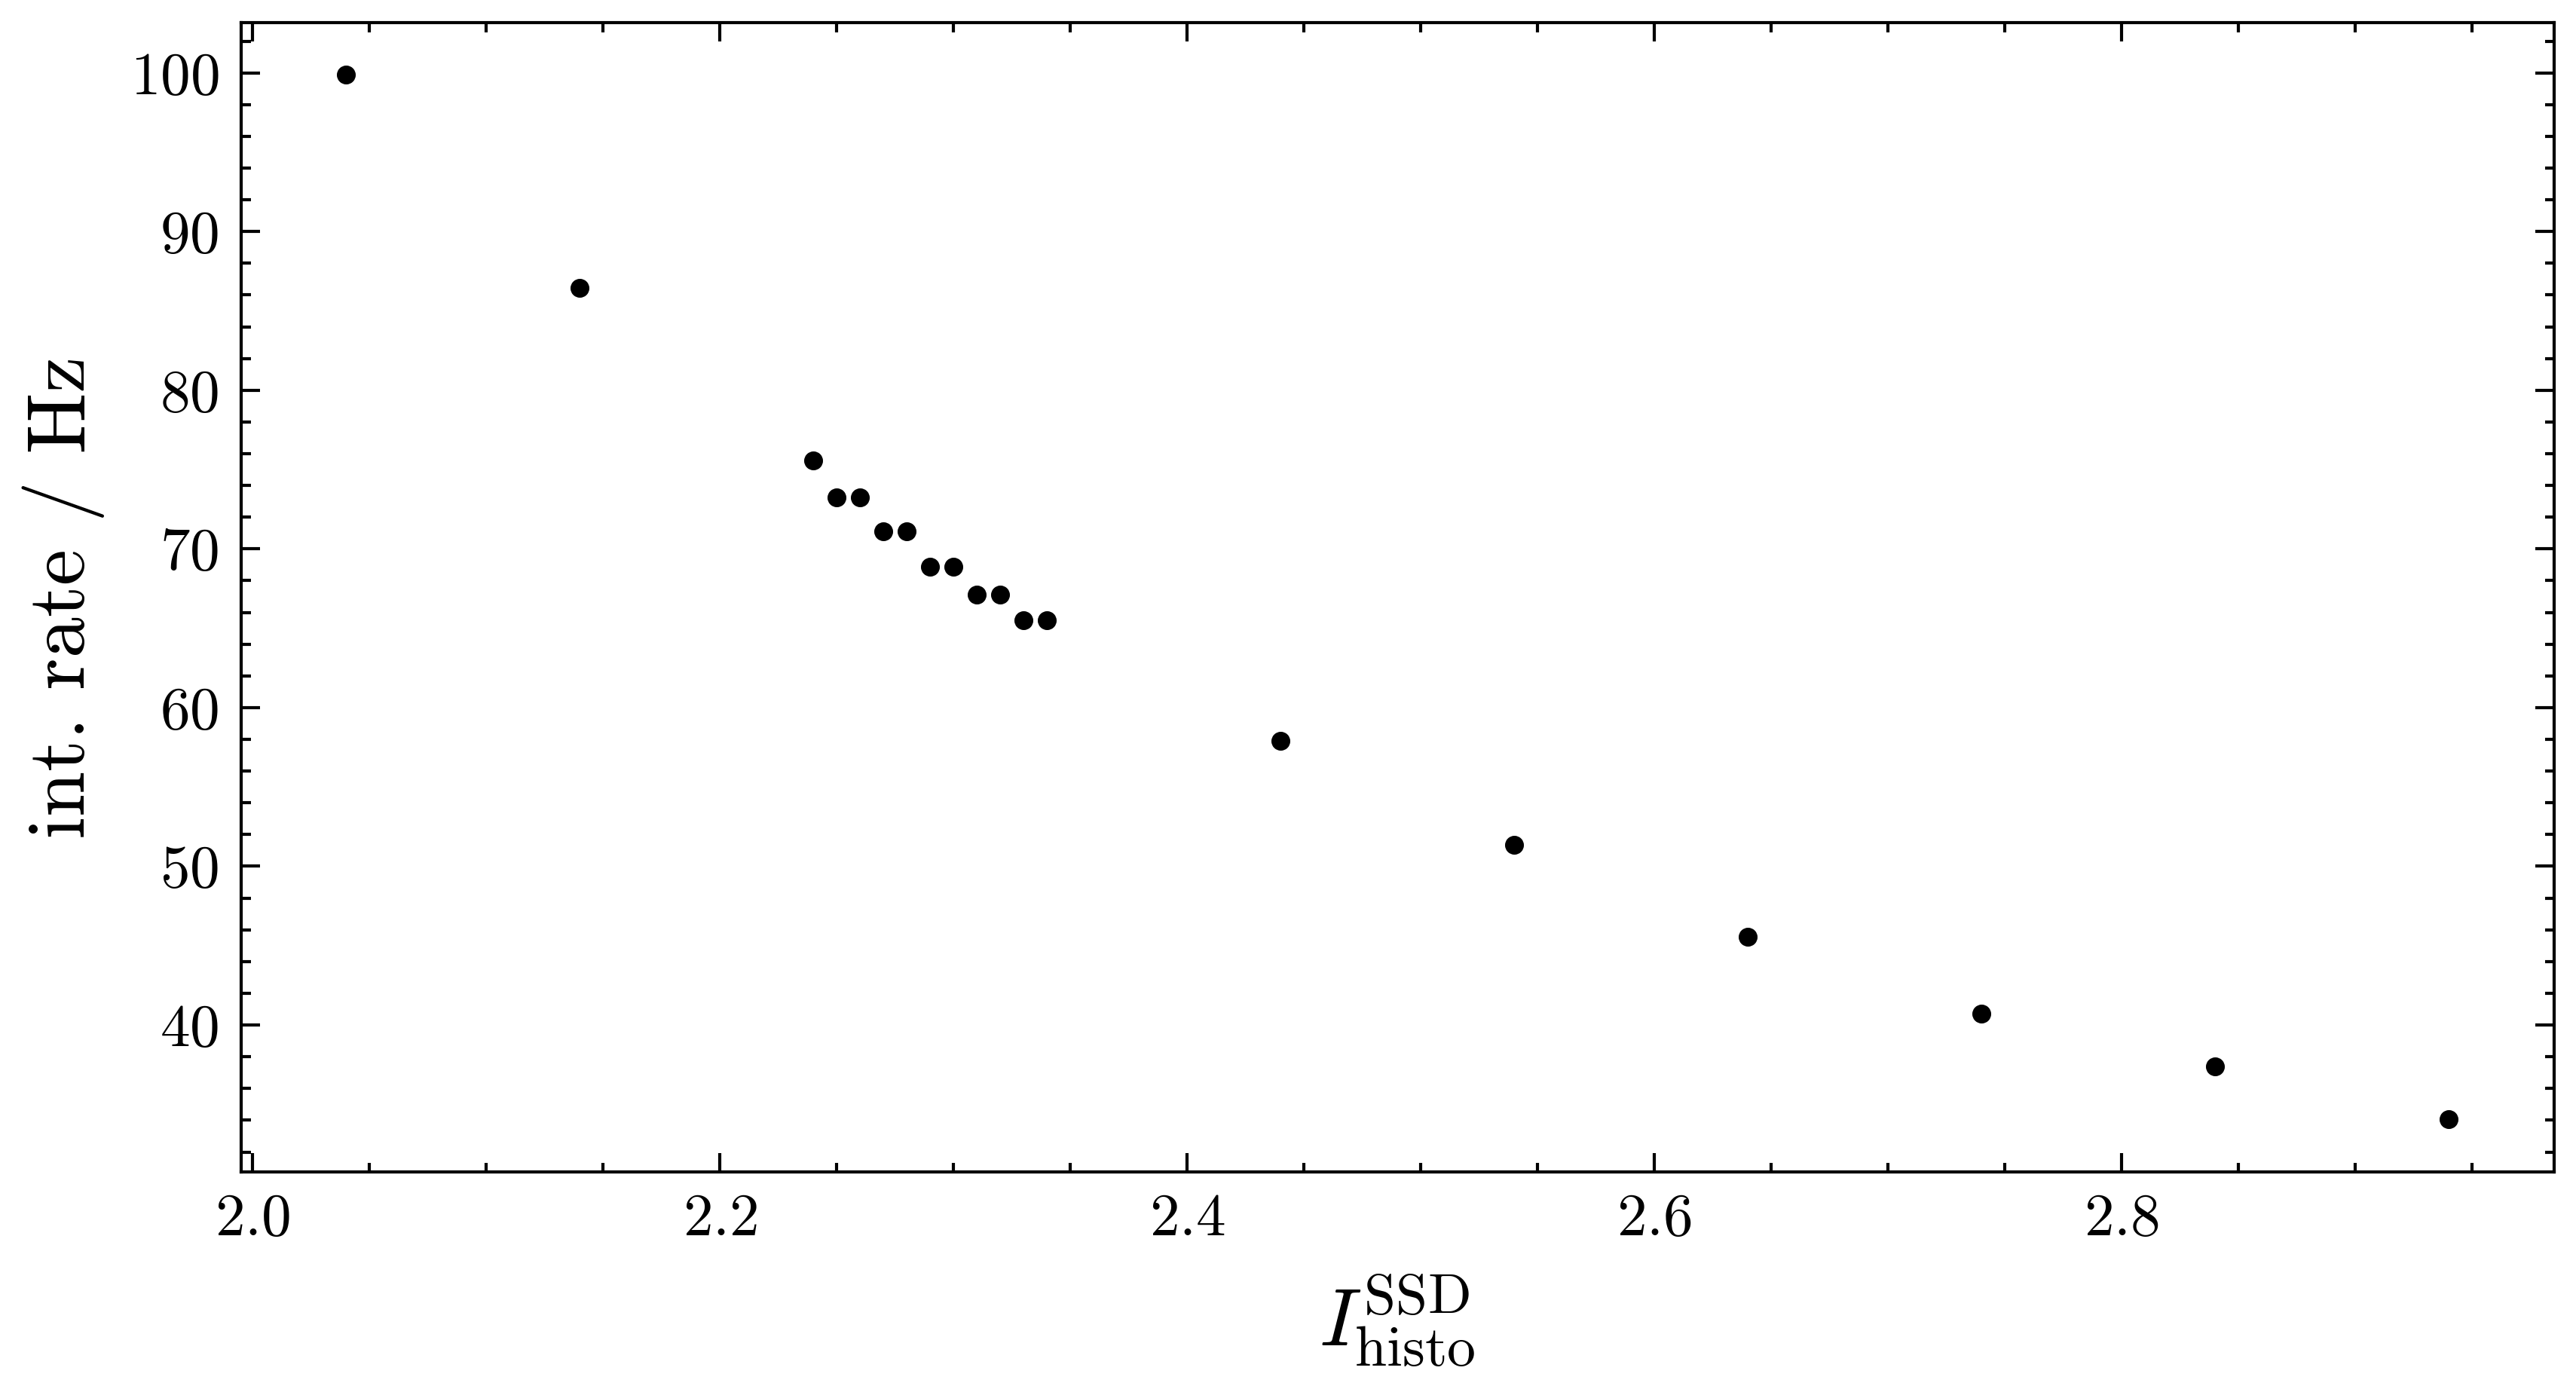

In [2]:
from utils.binaries import *
from utils.plotting import *

rates = tools.pickle_load('rates.pkl')

for k,v in rates.items():
    plt.scatter(float(k), v, c='k')

# tools.pickle_save('rates.pkl', rates)

plt.xlabel("$I^\mathrm{SSD}_\mathrm{histo}$")
plt.ylabel("int. rate / Hz")

In [4]:
2.64/2.3

1.1478260869565218